In [1]:
import pandas as pd
import numpy as np

### Stack e Unstack

In [2]:
df = pd.DataFrame({'Impar':[1,3,5,7],'Par':[2,4,6,8]})
df

,Impar,Par
0,1,2
1,3,4
2,5,6
3,7,8


In [3]:
df_new = pd.DataFrame({'valores':df.stack()})
df_new

valores
0 Impar        1
  Par          2
1 Impar        3
  Par          4
2 Impar        5
  Par          6
3 Impar        7
  Par          8

In [4]:
df_new.index

MultiIndex([(0, 'Impar'),
            (0,   'Par'),
            (1, 'Impar'),
            (1,   'Par'),
            (2, 'Impar'),
            (2,   'Par'),
            (3, 'Impar'),
            (3,   'Par')],
           )

In [5]:
df_new.unstack()

valores    
    Impar Par
0       1   2
1       3   4
2       5   6
3       7   8

In [6]:
data = {'Grupo': ['A', 'A', 'B', 'B'],
        'Categoria': ['X', 'Y', 'X', 'Y'],
        'Ano': [2019, 2020, 2019, 2020],
        'Valor': [10, 20, 30, 40]}

df = pd.DataFrame(data)
df

,Grupo,Categoria,Ano,Valor
0,A,X,2019,10
1,A,Y,2020,20
2,B,X,2019,30
3,B,Y,2020,40


In [7]:
df_stacked=df.stack()
df_stacked


0  Grupo           A
   Categoria       X
   Ano          2019
   Valor          10
1  Grupo           A
   Categoria       Y
   Ano          2020
   Valor          20
2  Grupo           B
   Categoria       X
   Ano          2019
   Valor          30
3  Grupo           B
   Categoria       Y
   Ano          2020
   Valor          40
dtype: object

In [8]:
df_stacked.index

MultiIndex([(0,     'Grupo'),
            (0, 'Categoria'),
            (0,       'Ano'),
            (0,     'Valor'),
            (1,     'Grupo'),
            (1, 'Categoria'),
            (1,       'Ano'),
            (1,     'Valor'),
            (2,     'Grupo'),
            (2, 'Categoria'),
            (2,       'Ano'),
            (2,     'Valor'),
            (3,     'Grupo'),
            (3, 'Categoria'),
            (3,       'Ano'),
            (3,     'Valor')],
           )

In [9]:
df.set_index(['Grupo','Categoria','Valor']).stack()

Grupo  Categoria  Valor     
A      X          10     Ano    2019
       Y          20     Ano    2020
B      X          30     Ano    2019
       Y          40     Ano    2020
dtype: int64

## Explode

In [10]:
data = {'col1': ['foo', 'bar', 'baz'],
      'col2': [[1, 2], [3, 4, 5], [6, 7]]}
df1 = pd.DataFrame(data)
df1

,col1,col2
0,foo,"[1, 2]"
1,bar,"[3, 4, 5]"
2,baz,"[6, 7]"


In [11]:
df1.explode('col2')

,col1,col2
0,foo,1
0,foo,2
1,bar,3
1,bar,4
1,bar,5
2,baz,6
2,baz,7


In [12]:
teds = ['Ted João','Ted Mariana','Ted Marcos']  
tags = [['saude','alimentação'],['espiritualidade','bem-estar','saude'],['tecnologia','inovação']]

df2= pd.DataFrame({'TED':teds, 'TAGS':tags})
df2

,TED,TAGS
0,Ted João,"[saude, alimentação]"
1,Ted Mariana,"[espiritualidade, bem-estar, saude]"
2,Ted Marcos,"[tecnologia, inovação]"


In [13]:
df2_exploded = df2.explode('TAGS')
df2_exploded

,TED,TAGS
0,Ted João,saude
0,Ted João,alimentação
1,Ted Mariana,espiritualidade
1,Ted Mariana,bem-estar
1,Ted Mariana,saude
2,Ted Marcos,tecnologia
2,Ted Marcos,inovação


In [14]:
df2_exploded.TAGS.value_counts()

TAGS
saude              2
alimentação        1
espiritualidade    1
bem-estar          1
tecnologia         1
inovação           1
Name: count, dtype: int64

In [15]:
dados = {
    'nome': ['Ana', 'Bruno', 'Carlos'],
    'detalhes': [
        {'atividade': 'ler', 'frequencia': 'diária'},
        {'atividade': 'jogar', 'frequencia': 'semanal'},
        {'atividade': 'cozinhar', 'frequencia': 'mensal'}
    ]
}
df = pd.DataFrame(dados)
df

,nome,detalhes
0,Ana,"{'atividade': 'ler', 'frequencia': 'diária'}"
1,Bruno,"{'atividade': 'jogar', 'frequencia': 'semanal'}"
2,Carlos,"{'atividade': 'cozinhar', 'frequencia': 'mensal'}"


In [16]:
pd.json_normalize(df['detalhes'])

,atividade,frequencia
0,ler,diária
1,jogar,semanal
2,cozinhar,mensal


In [17]:
df.explode('detalhes')

,nome,detalhes
0,Ana,atividade
0,Ana,frequencia
1,Bruno,atividade
1,Bruno,frequencia
2,Carlos,atividade
2,Carlos,frequencia


## PIVOT e PIVOT TABLES

In [18]:
data = {'Grupo': ['A', 'A', 'B', 'B'],
        'Categoria': ['X', 'Y', 'X', 'Y'],
        'Ano': [2019, 2020, 2019, 2020],
        'Valor': [10, 20, 30, 40]}

df = pd.DataFrame(data)
df

,Grupo,Categoria,Ano,Valor
0,A,X,2019,10
1,A,Y,2020,20
2,B,X,2019,30
3,B,Y,2020,40


In [19]:
df.pivot(index='Grupo',columns='Ano',values='Valor')

Ano,2019,2020
Grupo,,
A,10,20
B,30,40


In [20]:
data2 = {'A': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
        'B': ['one', 'one', 'two', 'two', 'one', 'one'],
        'C': [1, 2, 3, 4, 5, 6],
        'D': [7, 8, 9, 10, 11, 12]}
df = pd.DataFrame(data2)
df

,A,B,C,D
0,foo,one,1,7
1,foo,one,2,8
2,foo,two,3,9
3,bar,two,4,10
4,bar,one,5,11
5,bar,one,6,12


In [21]:
pd.pivot_table(df,index='A',columns='B',values='D',aggfunc='mean')

B,one,two
A,,
bar,11.5,10.0
foo,7.5,9.0


In [22]:
import seaborn as sns

In [23]:
df_sns = sns.load_dataset('glue')
df_sns

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [24]:
df_sns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    64 non-null     object 
 1   Year     64 non-null     int64  
 2   Encoder  64 non-null     object 
 3   Task     64 non-null     object 
 4   Score    64 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [25]:
df_sns_pivot = df_sns.pivot(index='Model',columns='Task',values='Score')
df_sns_pivot

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<Axes: xlabel='Task', ylabel='Model'>

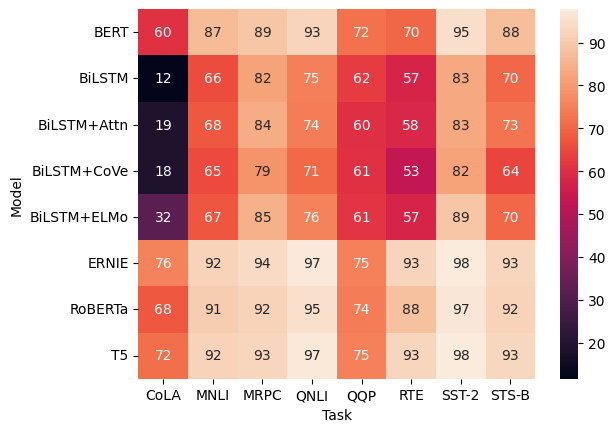

In [26]:
sns.heatmap(df_sns_pivot,annot=True)

### Matriz Transposta ou Transpose()

In [27]:
df_sns_pivot.T
df_sns_pivot.transpose()

Model,BERT,BiLSTM,BiLSTM+Attn,BiLSTM+CoVe,BiLSTM+ELMo,ERNIE,RoBERTa,T5
Task,,,,,,,,
CoLA,60.5,11.6,18.6,18.5,32.1,75.5,67.8,71.6
MNLI,86.7,65.6,67.6,65.4,67.2,92.3,90.8,92.2
MRPC,89.3,81.8,83.9,78.7,84.7,93.9,92.3,92.8
QNLI,92.7,74.6,74.3,70.8,75.5,97.3,95.4,96.9
QQP,72.1,62.5,60.1,60.6,61.1,75.2,74.3,75.1
RTE,70.1,57.4,58.4,52.7,57.4,92.6,88.2,92.8
SST-2,94.9,82.8,83.0,81.9,89.3,97.8,96.7,97.5
STS-B,87.6,70.3,72.8,64.4,70.3,93.0,92.2,93.1


<Axes: xlabel='Model', ylabel='Task'>

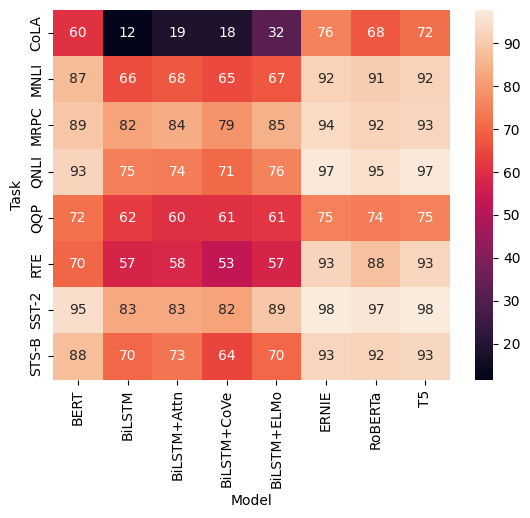

In [28]:
sns.heatmap(df_sns_pivot.T,annot=True)

## Tratamento de dados

### Encontrando Missing Values

In [29]:
data = {'nome': ['Joao','Maria','Andre','Carlos'],
        'idade': [12, 40, 22, 35],
        'tamanho': [1.51, 1.51, 1.81, 1.74]}
df = pd.DataFrame(data)
df

,nome,idade,tamanho
0,Joao,12,1.51
1,Maria,40,1.51
2,Andre,22,1.81
3,Carlos,35,1.74


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nome     4 non-null      object 
 1   idade    4 non-null      int64  
 2   tamanho  4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [31]:
df.shape

(4, 3)

In [32]:
df.idade = df.idade.astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nome     4 non-null      object 
 1   idade    4 non-null      float64
 2   tamanho  4 non-null      float64
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


In [33]:
df.idade = df.idade.astype(int)

In [34]:
dados = {'A':[1,2,np.nan,4],
         'B':[5,np.nan,7,8]}
df=pd.DataFrame(dados)
df

,A,B
0,1.0,5.0
1,2.0,NaN
2,NaN,7.0
3,4.0,8.0


In [50]:
df.isna()

,A,B
0,False,False
1,False,False
2,False,False
3,False,False


In [52]:
df[~df.isna()]

,A,B
0,1.00,5.00
1,2.00,6.66
2,2.33,7.00
3,4.00,8.00


In [37]:
df[df.B.isna()]

,A,B
1,2.0,NaN


In [38]:
data = {'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, 7, 8],
        'C': [5, 3, 2, 1]}

df2 = pd.DataFrame(data)
df2

,A,B,C
0,1.0,5.0,5
1,2.0,NaN,3
2,NaN,7.0,2
3,4.0,8.0,1


In [39]:
df2.dropna()

,A,B,C
0,1.0,5.0,5
3,4.0,8.0,1


In [40]:
df2.dropna(subset='A')

,A,B,C
0,1.0,5.0,5
1,2.0,NaN,3
3,4.0,8.0,1


In [41]:
df2.dropna(axis=1)

,C
0,5
1,3
2,2
3,1


### Preencher

In [42]:
df2.fillna(0)

,A,B,C
0,1.0,5.0,5
1,2.0,0.0,3
2,0.0,7.0,2
3,4.0,8.0,1


In [43]:
df=df.fillna({'A':2.33,'B':6.66})
df

,A,B
0,1.00,5.00
1,2.00,6.66
2,2.33,7.00
3,4.00,8.00


In [44]:
df2 = df2.fillna(df2.mean()).round(2)
df2

,A,B,C
0,1.00,5.00,5
1,2.00,6.67,3
2,2.33,7.00,2
3,4.00,8.00,1


### Exercício

Utilizando a base "realtor-data.csv" gerar uma base com os seguintes requisitos:
Eliminar as linhas com missing values em variáveis categóricas.
Substituir missing values das colunas bed e bath por zero.
Substituir missing values da coluna house_size pela mediana.

In [45]:
realtor = pd.read_csv("../datasets/realtor-data.csv")
realtor.tail(3)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0
99999,for_sale,3.0,3.0,21.67,Grafton,Massachusetts,1536.0,1846.0,2020-10-06,535000.0


In [46]:
realtor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [47]:
realtor_dup = realtor.drop_duplicates(keep='last')
realtor_dup.shape

(14636, 10)

In [48]:
realtor_dup.prev_sold_date = pd.to_datetime(realtor_dup.prev_sold_date)
realtor_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14636 entries, 47 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status          14636 non-null  object        
 1   bed             11288 non-null  float64       
 2   bath            11289 non-null  float64       
 3   acre_lot        12792 non-null  float64       
 4   city            14620 non-null  object        
 5   state           14636 non-null  object        
 6   zip_code        14608 non-null  float64       
 7   house_size      11290 non-null  float64       
 8   prev_sold_date  5296 non-null   datetime64[ns]
 9   price           14636 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 1.2+ MB


/tmp/ipykernel_2381/2521721803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtor_dup.prev_sold_date = pd.to_datetime(realtor_dup.prev_sold_date)
